In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn  
import seaborn as sns

In [2]:
data1=pd.read_csv('housing.csv')
data1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
data1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
data1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
import seaborn as sns

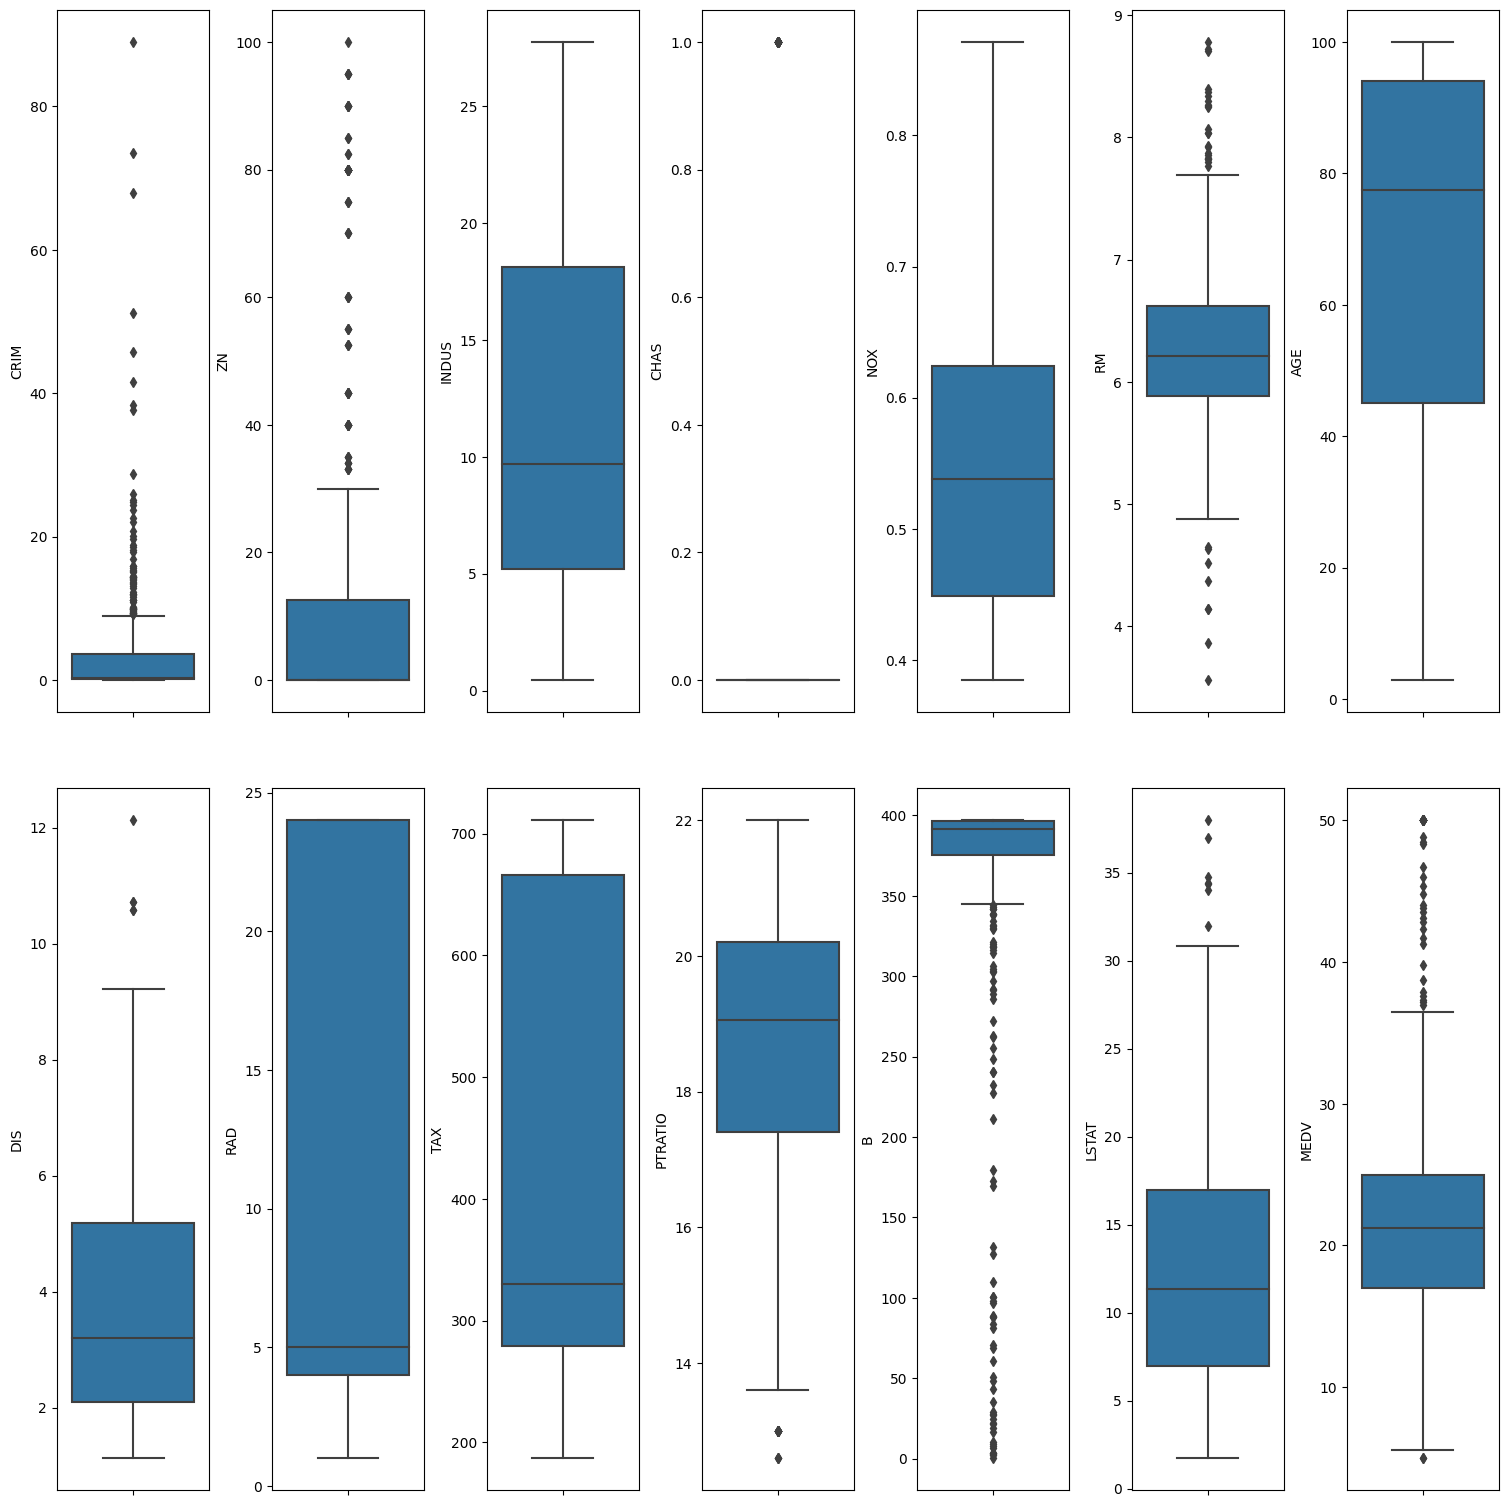

In [6]:
fig,axs=plt.subplots(ncols=7,nrows=2,figsize=(15,15))
index=0
axs=axs.flatten()

for k,v in data1.items():
    sns.boxplot(y=k,data=data1,ax=axs[index])
    index+=1

plt.tight_layout(pad=0.4,h_pad=5.0,w_pad=0.5)

Here we found outliers in CRIM,ZN,RM,B
now we have to find percentage of outliers....

In [7]:
for k,v in data1.items():
    q1=v.quantile(0.25)
    q3=v.quantile(0.75)
    irq=q3-q1
    v_col=v[(v<q1-1.5*irq)|(v>q3+1.5*irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 12.85%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 6.92%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [8]:
# Q1=data1['MEDV'].quantile(0.25)
# Q2=data1['MEDV'].quantile(0.5)
# Q3=data1['MEDV'].quantile(0.75)
# iqr=Q3-Q1
# lowlim=Q1-1.5*iqr
# upplim=Q3+1.5*iqr
# print(lowlim)
# print(upplim)

In [9]:
# from feature_engine.outliers import ArbitraryOutlierCapper
# arb=ArbitraryOutlierCapper(min_capping_dict={'MEDV':5.0624},max_capping_dict={'MEDV':36.9625})
# data1[['MEDV']]=arb.fit_transform(data1[['MEDV']])
# sns.boxplot(data1['MEDV'])

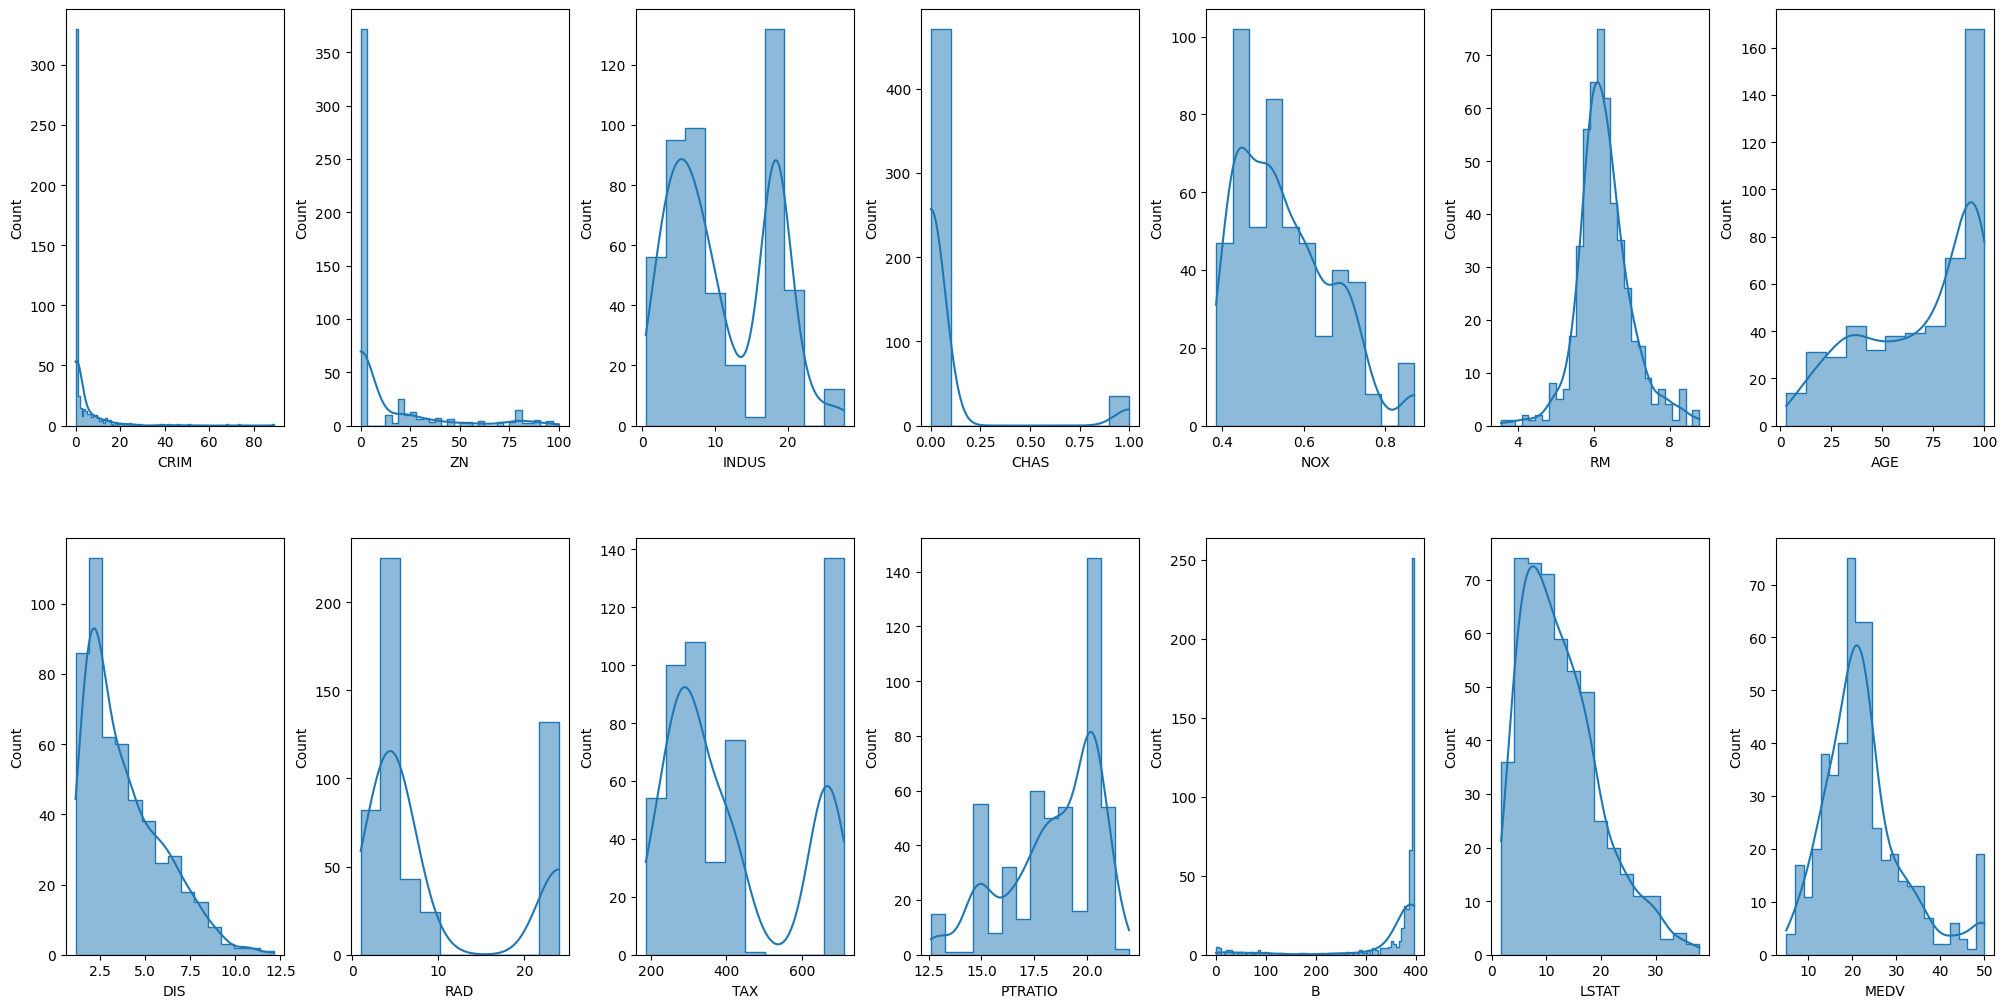

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in data1.items():
    sns.histplot(data=data1, x=v, kde=True,ax=axs[index],element='step')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### CRIM,ZN,B,CHAS are highly skewed distribution

In [9]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
columns_sels=['LSTAT','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO']
X=data1.loc[:,columns_sels]
Y=data1['MEDV']

In [10]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1


,train acc,test acc,cvs
0,0.729512,0.666230,0.374766
1,0.735092,0.498483,0.374766
2,0.721587,0.670207,0.374766
3,0.711178,0.722257,0.374766
4,0.703460,0.748536,0.374766
5,0.710636,0.723873,0.374766
6,0.704793,0.765613,0.374766
7,0.713393,0.711045,0.374766
8,0.727325,0.665094,0.374766
9,0.718713,0.695715,0.374766


In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=37)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())


0.7402013354356751
0.6343009529015606
0.37476582375210343


In [12]:
y_pred = lrmodel.predict(xtest)

In [13]:
from sklearn.metrics import r2_score
# r2_score(ytest,y_pred)y_pred = lrmodel.predict(X_test)
# np.set_printoptions(precision=2)

In [14]:
rfmodel=RandomForestRegressor(random_state=37)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=37)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=37,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())


0.9760070481352737
0.8739378786140999
0.600043670803168
{'n_estimators': 120}
0.9767996619913231
0.873433903912104
0.596824111933889


In [15]:
# df.drop(df[['sex','region']],axis=1,inplace=True)
# Xf=df.drop(df[['charges']],axis=1)
# X=df.drop(df[['charges']],axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=37)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())


0.9402173146452841
0.8579503040112423
0.625597424966542


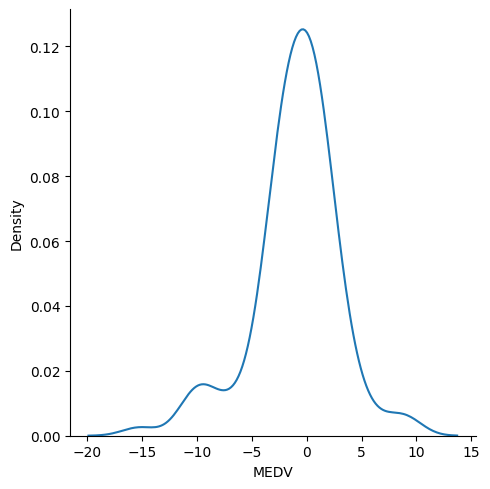

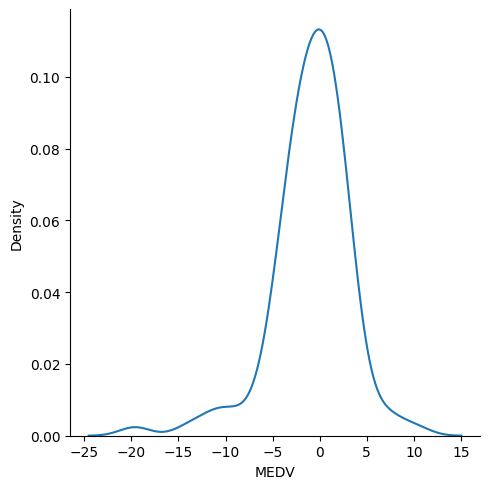

In [16]:
import seaborn as sns
sns.displot(ypredtest2-ytest,kind='kde')
import seaborn as sns
sns.displot(ypredtest4-ytest,kind='kde')

In [17]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats


,Importance
LSTAT,0.494193
INDUS,0.009354
NOX,0.044446
RM,0.324349
AGE,0.018632
DIS,0.066028
RAD,0.003599
TAX,0.015283
PTRATIO,0.024114


In [18]:
important_features=feats[feats['Importance']>0.01]
important_features


,Importance
LSTAT,0.494193
NOX,0.044446
RM,0.324349
AGE,0.018632
DIS,0.066028
TAX,0.015283
PTRATIO,0.024114


In [19]:
columns_sel=['LSTAT','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO']
Xf=data1.loc[:,columns_sels]
Y1=data1['MEDV']

In [20]:
# Xf=df.drop(df[['charges']],axis=1)
# X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y1,test_size=0.2,random_state=37)
finalmodel=RandomForestRegressor(random_state=37,n_estimators=120)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())


0.9767996619913231
0.873433903912104
0.596824111933889


In [21]:
from pickle import dump
dump(finalmodel,open('house_price.pkl','wb'))

In [22]:
new_data=pd.DataFrame({'LSTAT':4.03,'INDUS':7.07,'NOX':0.469,'RM':7.185,'AGE':61.1,'DIS':4.9671,'RAD':2,'TAX':242,'PTRATIO':17.8},index=[0])
finalmodel.predict(new_data)


array([34.1125])

In [23]:
new_data1=pd.DataFrame({'LSTAT':5,'INDUS':8,'NOX':1,'RM':3.185,'AGE':21.1,'DIS':4.9671,'RAD':5,'TAX':42,'PTRATIO':20.8},index=[0])
finalmodel.predict(new_data1)

array([23.765])